In [1]:
import polars as pl
import os
from tqdm import tqdm
import pandas as pd
import csv
import numpy as np
import json
import seaborn as sns
import glob
from plotnine import * # (ggplot, geom_boxplot, aes, facet_wrap, theme, element_text,
                    #    element_blank, theme_minimal, coord_flip, facet_grid, geom_point,
                    #    ylim)
import matplotlib.pyplot as plt
import plotnine

In [2]:
overall_results = glob.glob('results/evals/*_overall.csv')
overall_results[0].split('/')[-1]

'OpenAI_gpt-4-1106-preview_fatal-prompt-v2_pharmexpert-v1_temp0_train_run3_lenient_overall.csv'

In [3]:
all_data = []
for label in tqdm(overall_results):
    [api_source, llm_model, prompt, system, temp, dataset, run, eval_method] = [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
    relevant_info = label.split('/')[-1].split('_')
    if relevant_info[0] == 'deepcadrme': # ['deepcadrme', '010', 'test', 'strict', 'overall']
        [llm_model, run, dataset, eval_method] = relevant_info[0:4]
        basename = llm_model
    elif relevant_info[0] == 'exact': # ['exact', 'train', 'lenient', 'overall']
        [llm_model, dataset, eval_method] = relevant_info[0:3]
        basename = '_'.join([llm_model])
    elif relevant_info[0] == 'code-llama-34b': #['code-llama-34b', 'fatal-prompt-v2', 'pharmexpert-v1', 'temp0', 'train', 'run0', 'strict']
        [llm_model, prompt, system_prompt, temp, dataset, run, eval_method] = relevant_info[:-1]
        basename = '_'.join([llm_model, prompt, system_prompt])
    else: # ['OpenAI', 'gpt-4-1106-preview', 'fatal-prompt-v2', 'pharmexpert-v1', 'temp0', 'train', 'run3', 'lenient', 'overall.csv']
        [api_source, llm_model, prompt, system, temp, dataset, run, eval_method] = relevant_info[:-1]
        basename = '_'.join([llm_model, prompt, system])
    
    with open(label, 'r') as f:
        data = pd.read_csv(f)
        data['api_source'] = api_source
        data['llm_model'] = llm_model
        data['prompt'] = prompt
        data['system'] = system
        data['temp'] = temp
        data['dataset'] = dataset
        data['run'] = run
        data['eval_method'] = eval_method
        data['base_name'] = basename
        all_data.append(data)

overall_results = pd.concat(all_data, axis=0, ignore_index=True)

  0%|          | 0/154 [00:00<?, ?it/s]

100%|██████████| 154/154 [00:00<00:00, 286.33it/s]


In [4]:
overall_results.to_csv('results/agg_evals/overall_results_across_models.csv', index=False)

In [5]:
overall_data = pd.melt(overall_results, id_vars = ['api_source', 'llm_model', 'section', 'ade_type', 'prompt', 'system',
                                                    'temp', 'dataset', 'run', 'eval_method',
                                                    'base_name'],
         value_vars = ['macro_f1',	'macro_precision',	'macro_recall',	'micro_f1',	'micro_precision',	'micro_recall'],
           var_name = 'metric', value_name = 'score')
overall_data[['level','metric']] = overall_data['metric'].str.split('_',expand=True)
overall_data.head()

,api_source,llm_model,section,ade_type,prompt,system,temp,dataset,run,eval_method,base_name,metric,score,level
0,OpenAI,gpt-4-1106-preview,adverse reactions,all,fatal-prompt-v2,pharmexpert-v1,temp0,train,run3,lenient,gpt-4-1106-preview_fatal-prompt-v2_pharmexpert-v1,f1,0.907731,macro
1,OpenAI,gpt-4-1106-preview,adverse reactions,discontinuous,fatal-prompt-v2,pharmexpert-v1,temp0,train,run3,lenient,gpt-4-1106-preview_fatal-prompt-v2_pharmexpert-v1,f1,NaN,macro
2,OpenAI,gpt-4-1106-preview,adverse reactions,exact-meddra,fatal-prompt-v2,pharmexpert-v1,temp0,train,run3,lenient,gpt-4-1106-preview_fatal-prompt-v2_pharmexpert-v1,f1,NaN,macro
3,OpenAI,gpt-4-1106-preview,adverse reactions,negated,fatal-prompt-v2,pharmexpert-v1,temp0,train,run3,lenient,gpt-4-1106-preview_fatal-prompt-v2_pharmexpert-v1,f1,NaN,macro
4,OpenAI,gpt-4-1106-preview,adverse reactions,non-meddra,fatal-prompt-v2,pharmexpert-v1,temp0,train,run3,lenient,gpt-4-1106-preview_fatal-prompt-v2_pharmexpert-v1,f1,NaN,macro


## Plotting Overall Performance

In [20]:
overall_data.query('ade_type == "all" & level == "macro" & base_name == "code-llama-34b_fatal-prompt-v2_pharmexpert-v1"')[
    ['base_name', 'metric', 'score','run', 'eval_method', 'section']
    ]

,base_name,metric,score,run,eval_method,section
1932,code-llama-34b_fatal-prompt-v2_pharmexpert-v1,f1,0.771039,run0,ember-v1,adverse reactions
1937,code-llama-34b_fatal-prompt-v2_pharmexpert-v1,f1,0.872128,run0,ember-v1,boxed warnings
1942,code-llama-34b_fatal-prompt-v2_pharmexpert-v1,f1,0.680594,run0,ember-v1,warnings and precautions
1947,code-llama-34b_fatal-prompt-v2_pharmexpert-v1,f1,0.751256,run0,ember-v1,all
2480,code-llama-34b_fatal-prompt-v2_pharmexpert-v1,f1,0.519045,run0,lenient,adverse reactions
2485,code-llama-34b_fatal-prompt-v2_pharmexpert-v1,f1,0.778639,run0,lenient,boxed warnings
2490,code-llama-34b_fatal-prompt-v2_pharmexpert-v1,f1,0.456021,run0,lenient,warnings and precautions
2495,code-llama-34b_fatal-prompt-v2_pharmexpert-v1,f1,0.537958,run0,lenient,all
3069,code-llama-34b_fatal-prompt-v2_pharmexpert-v1,f1,0.433910,run0,strict,adverse reactions
3074,code-llama-34b_fatal-prompt-v2_pharmexpert-v1,f1,0.552840,run0,strict,boxed warnings


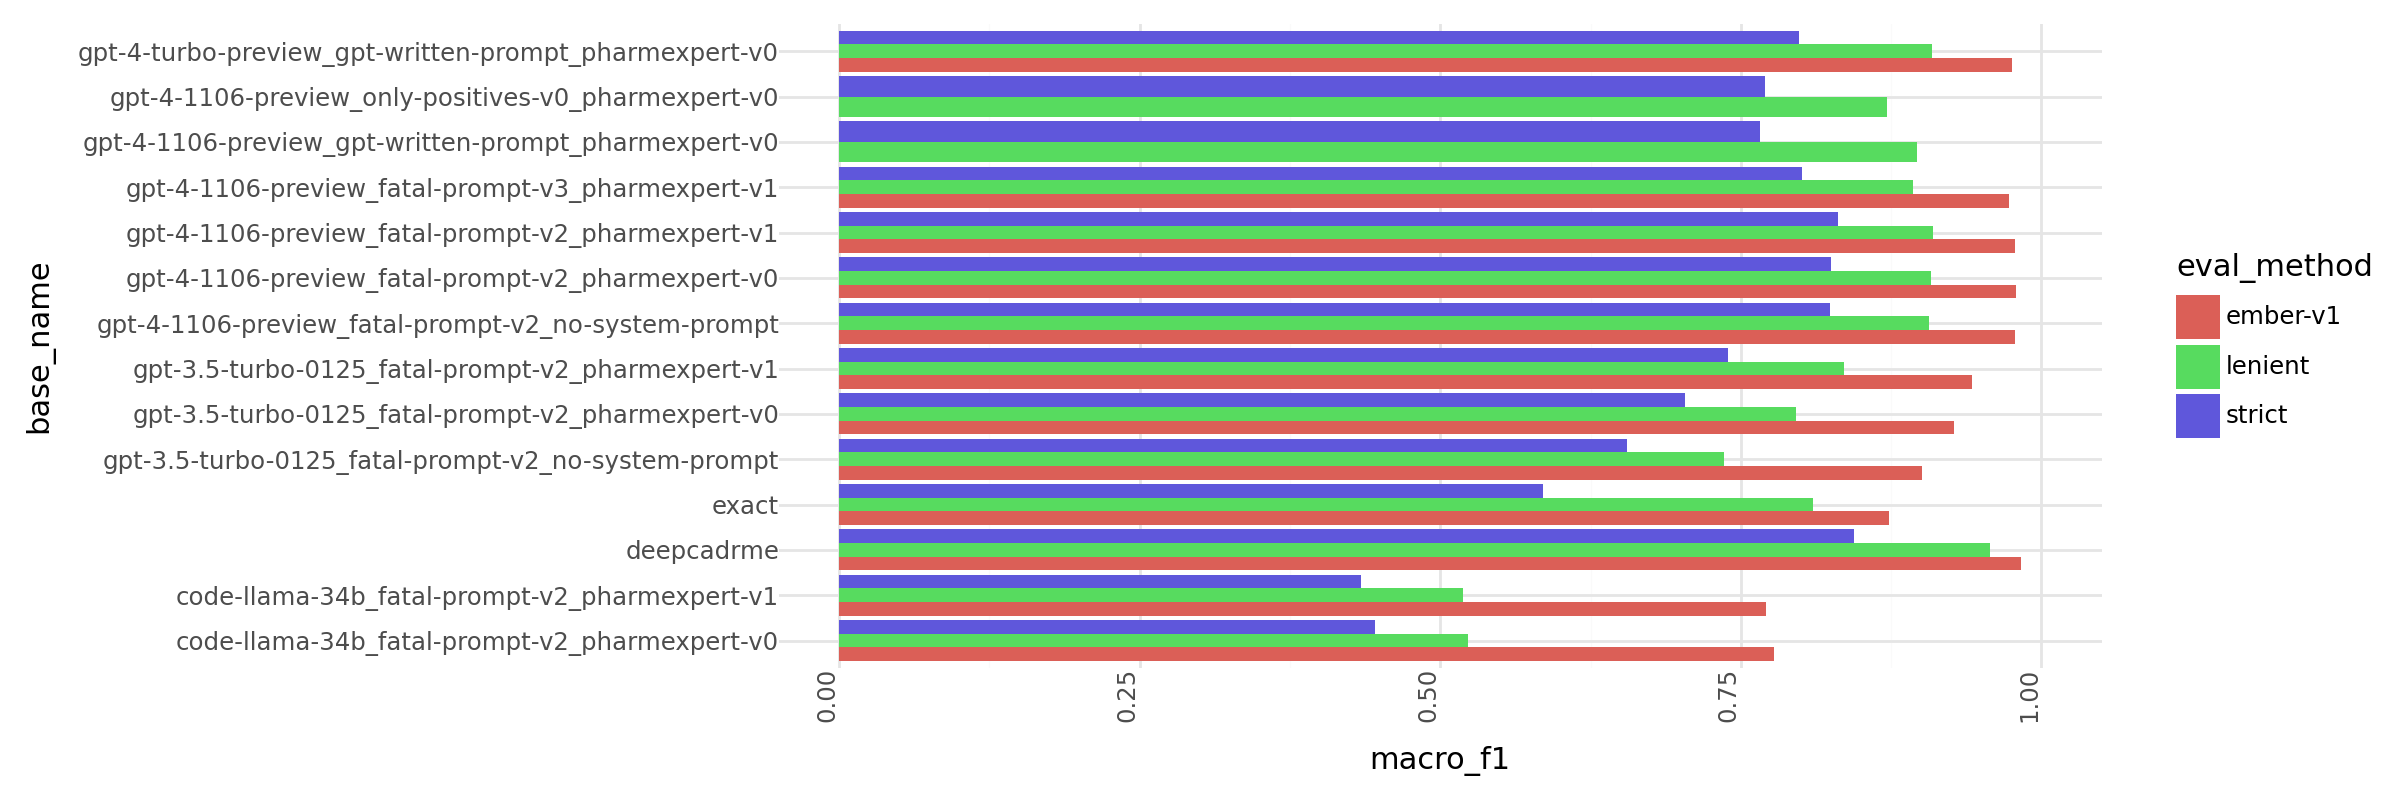

In [21]:
plotnine.options.figure_size = (12, 4) 

(
    ggplot(overall_results.query('ade_type == "all" & section == "adverse reactions"'),
           aes(x = 'base_name', y = 'macro_f1', fill = 'eval_method')) +
        geom_bar(stat = 'identity', position = 'dodge') +
        theme_minimal() +
        theme(axis_text_x = element_text(angle = 90, hjust = 1)) +
        ylim(0, 1) +
        coord_flip()
)

## Get granular results

In [7]:
granular_results = glob.glob('results/evals/*_granular.csv')
granular_results[0].split('/')[-1]

'OpenAI_gpt-4-1106-preview_fatal-prompt-v2_pharmexpert-v1_temp0_train_run4_lenient_granular.csv'

In [8]:
all_gran = []
for label in tqdm(granular_results):
    [api_source, llm_model, prompt, system, temp, dataset, run, eval_method] = [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
    relevant_info = label.split('/')[-1].split('_')
    if relevant_info[0] == 'deepcadrme': # ['deepcadrme', '010', 'test', 'strict', 'overall']
        [llm_model, run, dataset, eval_method] = relevant_info[0:4]
        basename = llm_model
    elif relevant_info[0] == 'exact': # ['exact', 'train', 'lenient', 'overall']
        [llm_model, dataset, eval_method] = relevant_info[0:3]
        basename = '_'.join([llm_model])
    elif relevant_info[0] == 'code-llama-34b': #['code-llama-34b', 'fatal-prompt-v2', 'pharmexpert-v1', 'temp0', 'train', 'run0', 'strict']
        [llm_model, prompt, system_prompt, temp, dataset, run, eval_method] = relevant_info[:-1]
        basename = '_'.join([llm_model, prompt, system_prompt])
    else: # ['OpenAI', 'gpt-4-1106-preview', 'fatal-prompt-v2', 'pharmexpert-v1', 'temp0', 'train', 'run3', 'lenient', 'overall.csv']
        [api_source, llm_model, prompt, system, temp, dataset, run, eval_method] = relevant_info[:-1]
        basename = '_'.join([llm_model, prompt, system])
    
    with open(label, 'r') as f:
        data = pd.read_csv(f)
        data['api_source'] = api_source
        data['llm_model'] = llm_model
        data['prompt'] = prompt
        data['system'] = system
        data['temp'] = temp
        data['dataset'] = dataset
        data['run'] = run
        data['eval_method'] = eval_method
        data['base_name'] = basename
        all_gran.append(data)

all_gran_results = pd.concat(all_gran, axis=0, ignore_index=True)

100%|██████████| 154/154 [00:00<00:00, 187.68it/s]


In [9]:
all_gran_results.to_csv('results/agg_evals/granular_results_across_models.csv', index=False)